In [1]:
from datetime import datetime, date
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/2008.csv')

In [3]:
df.shape

(7009728, 29)

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
pd.DataFrame(df.isnull().sum()/df.shape[0]*100)

,0
Year,0.000000
Month,0.000000
DayofMonth,0.000000
DayOfWeek,0.000000
DepTime,1.943670
CRSDepTime,0.000000
ArrTime,2.163408
CRSArrTime,0.000000
UniqueCarrier,0.000000
FlightNum,0.000000


In [6]:
df = df.loc[df.Month.isin([11,12]),:]

In [7]:
df.drop(df[df['ArrTime'].isnull()].index, inplace = True)
df.drop(df[df['ActualElapsedTime'].isnull()].index, inplace = True)
df.drop(df[df['CRSElapsedTime'].isnull()].index, inplace = True)
df.drop(df[df['TaxiIn'].isnull()].index, inplace = True)
df.drop(df[df['ArrDelay'].isnull()].index, inplace = True)

In [8]:
df['CarrierDelay'].fillna((df['CarrierDelay'].min()), inplace=True)
df['WeatherDelay'].fillna((df['WeatherDelay'].min()), inplace=True)
df['NASDelay'].fillna((df['NASDelay'].min()), inplace=True)
df['SecurityDelay'].fillna((df['SecurityDelay'].min()), inplace=True)
df['LateAircraftDelay'].fillna((df['LateAircraftDelay'].min()), inplace=True)

# Data exploration

In [9]:
df.drop(df[df.Cancelled == 1].index, inplace = True)

In [10]:
df['Lateness'] = [1 if x >= 30 else 0 for x in df.loc[:,'ArrDelay']]

In [11]:
lateness = df[df['Lateness']==1]

Month,11,12
Lateness,,
0,90.95281,78.996545
1,9.04719,21.003455


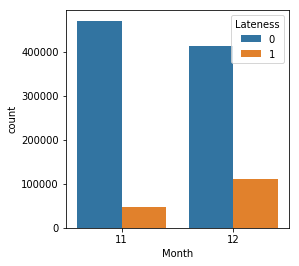

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'Month', hue = 'Lateness', data = df)
pd.crosstab(df.Month, df.Lateness).T.apply(lambda x: x/x.sum()*100)

DayofMonth,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Lateness,,,,,,,,,,,,,,,,,,,,,
0,77.700995,90.96522,92.683534,92.219622,93.715606,90.014689,88.369014,92.943511,88.193635,86.98495,...,78.94753,80.180694,82.009832,90.346845,82.326808,76.372712,89.157007,90.017759,74.05522,84.680513
1,22.299005,9.03478,7.316466,7.780378,6.284394,9.985311,11.630986,7.056489,11.806365,13.01505,...,21.05247,19.819306,17.990168,9.653155,17.673192,23.627288,10.842993,9.982241,25.94478,15.319487


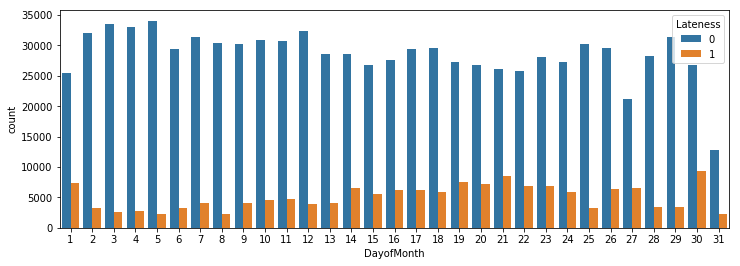

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'DayofMonth', hue = 'Lateness', data = df)
pd.crosstab(df.DayofMonth, df.Lateness).T.apply(lambda x: x/x.sum()*100)

DayOfWeek,1,2,3,4,5,6,7
Lateness,,,,,,,
0,85.474802,86.365209,85.671401,85.958081,83.18031,85.165152,82.646554
1,14.525198,13.634791,14.328599,14.041919,16.81969,14.834848,17.353446


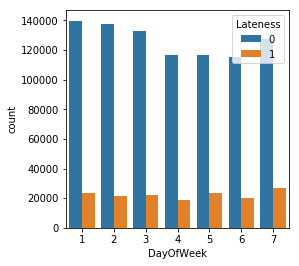

In [14]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'DayOfWeek', hue = 'Lateness', data = df)
pd.crosstab(df.DayOfWeek, df.Lateness).T.apply(lambda x: x/x.sum()*100)

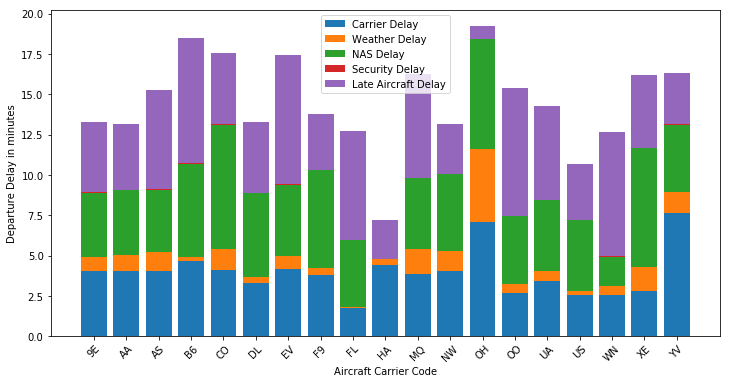

In [15]:
df['total_delay'] = (df['CarrierDelay'] + df['WeatherDelay'] + df['NASDelay'] + df['SecurityDelay'] + df['LateAircraftDelay'])
df_delayed = df[~np.isnan(df['total_delay'])]
df['total_delay'].fillna(0, inplace=True)

carrier_group = df_delayed['CarrierDelay'].groupby(df_delayed['UniqueCarrier']).mean()
weather_group = df_delayed['WeatherDelay'].groupby(df_delayed['UniqueCarrier']).mean()
nas_group = df_delayed['NASDelay'].groupby(df_delayed['UniqueCarrier']).mean()
security_group = df_delayed['SecurityDelay'].groupby(df_delayed['UniqueCarrier']).mean()
late_group = df_delayed['LateAircraftDelay'].groupby(df_delayed['UniqueCarrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')
ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Departure Delay in minutes')
plt.legend()
plt.show()

In [16]:
remove = ['TaxiIn', 'TaxiOut','AirTime','Year', 'Cancelled', 'Diverted', 'FlightNum', 'TailNum', 'CancellationCode']
df.drop(remove, axis = 1, inplace = True)

In [17]:
df['DepDelay'] = df['DepDelay']/60
df['ArrDelay'] = df['ArrDelay']/60
df['ActualElapsedTime'] = df['ActualElapsedTime']/60
df['CRSElapsedTime'] = df['CRSElapsedTime']/60
df['CarrierDelay'] = df['CarrierDelay']/60
df['WeatherDelay'] = df['WeatherDelay']/60
df['NASDelay'] = df['NASDelay']/60
df['SecurityDelay'] = df['SecurityDelay']/60
df['LateAircraftDelay'] = df['LateAircraftDelay']/60

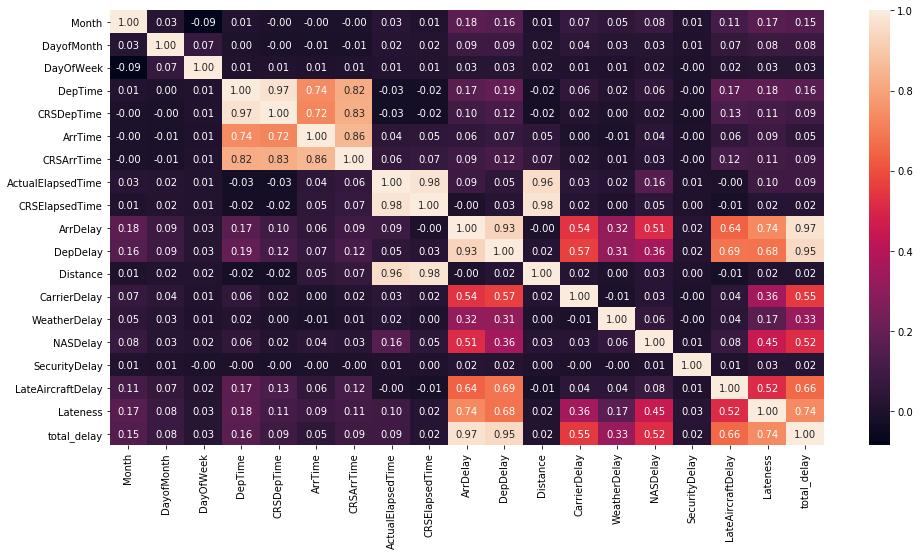

In [18]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

EnlapsedTime and CRSEnlapsedTime is the time to move from one destination to another and seems not much different from one another. Thus these 2 are high correlated with 'Distance' variable, so I decided to drop them.
ArrDelay is high correlated with DepDelay also, this is easy to understand: a flight depart late will likely to arrive late. I have already had 'Lateness' to indicate late coming flight, so this variable is no longer necessary.
And CRSDepTime is also in a high correlation with DepTime, so dropped it also.

In [19]:
df.drop(columns = ['ActualElapsedTime', 'CRSElapsedTime', 'CRSDepTime', 'ArrDelay'], inplace = True)

In [20]:
from sklearn.preprocessing import LabelEncoder
lben = LabelEncoder()
df['UniqueCarrier'] = lben.fit_transform(df.UniqueCarrier)
df['Origin'] = lben.fit_transform(df.Origin)
df['Dest'] = lben.fit_transform(df.Dest)

0    885643
1    157077
Name: Lateness, dtype: int64

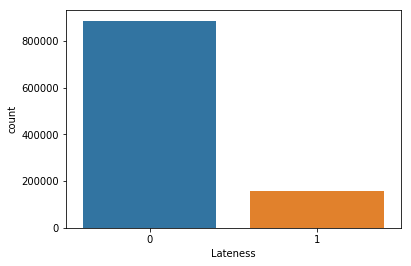

In [21]:
sns.countplot(df.Lateness)
df['Lateness'].value_counts()

# Analyzing

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, classification_report, mean_squared_error
from sklearn.decomposition import PCA
from sklearn import svm

In [24]:
x = df.loc[:, df.columns != 'Lateness']
y = df.Lateness

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

Apply Naive Bayes on the original data

In [26]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print(classification_report(y_test, nb.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97    442754
          1       0.78      1.00      0.88     78606

avg / total       0.97      0.96      0.96    521360



Apply Ridge Regression and tuning theta coefficent

In [27]:
rid = RidgeClassifier(alpha = 0.5, class_weight = 'balanced')
rid.fit(x_train, y_train)
print(classification_report(y_test, rid.predict(x_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98    442754
          1       0.90      0.80      0.85     78606

avg / total       0.96      0.96      0.96    521360



In [29]:
rid = RidgeClassifier(alpha = 1, class_weight = 'balanced')
rid.fit(x_train, y_train)
print(classification_report(y_test, rid.predict(x_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98    442754
          1       0.90      0.80      0.85     78606

avg / total       0.96      0.96      0.96    521360



In [31]:
rid = RidgeClassifier(alpha = 5, class_weight = 'balanced')
rid.fit(x_train, y_train)
print(classification_report(y_test, rid.predict(x_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98    442754
          1       0.90      0.80      0.85     78606

avg / total       0.96      0.96      0.96    521360



Apply Logistic Regression

In [32]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)
print(classification_report(y_test, lr.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    442754
          1       0.97      1.00      0.99     78606

avg / total       1.00      1.00      1.00    521360



# Tunning using downsampling

Area under ROC cureve: 0.997538551235475


Text(0.5,1,'Receiver Operating Characteristic Plot')

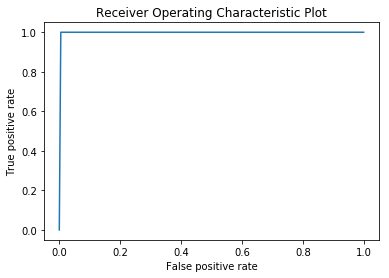

In [33]:
from sklearn.metrics import roc_curve, auc
predicted_y = lr.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, predicted_y)
print('Area under ROC cureve:' ,auc(fpr, tpr))
fig = plt.figure(1)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Plot')

Apply Decision Tree

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(classification_report(y_test, dt.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    442754
          1       1.00      1.00      1.00     78606

avg / total       1.00      1.00      1.00    521360



Apply Gradient Boosting

In [35]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print(classification_report(y_test, gb.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    442754
          1       1.00      1.00      1.00     78606

avg / total       1.00      1.00      1.00    521360



Apply Random Forest

In [ ]:
df['Lateness'].value_counts()

Down sampling for imbalanced data

In [36]:
from sklearn.utils import resample
down_sampling = df[df.Lateness == 1]
down_sampling = down_sampling.append(resample(df[df.Lateness == 0], n_samples = 157077, random_state = 0))
down_sampling.Lateness.value_counts()

1    157077
0    157077
Name: Lateness, dtype: int64

In [42]:
x = down_sampling.loc[:, df.columns != 'Lateness']
y = down_sampling.Lateness

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

Apply Naive Bayes on the original data

In [44]:
nb = GaussianNB()
nb.fit(x_train, y_train)
print(classification_report(y_test, nb.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97     78432
          1       0.95      1.00      0.97     78645

avg / total       0.97      0.97      0.97    157077



Apply Ridge Regression and tuning theta coefficent

In [45]:
rid = RidgeClassifier(alpha = 0.5, class_weight = 'balanced')
rid.fit(x_train, y_train)
print(classification_report(y_test, rid.predict(x_test)))

             precision    recall  f1-score   support

          0       0.83      0.98      0.90     78432
          1       0.98      0.81      0.88     78645

avg / total       0.91      0.89      0.89    157077



In [46]:
rid = RidgeClassifier(alpha = 1, class_weight = 'balanced')
rid.fit(x_train, y_train)
print(classification_report(y_test, rid.predict(x_test)))

             precision    recall  f1-score   support

          0       0.83      0.98      0.90     78432
          1       0.98      0.81      0.88     78645

avg / total       0.91      0.89      0.89    157077



In [47]:
rid = RidgeClassifier(alpha = 5, class_weight = 'balanced')
rid.fit(x_train, y_train)
print(classification_report(y_test, rid.predict(x_test)))

             precision    recall  f1-score   support

          0       0.83      0.98      0.90     78432
          1       0.98      0.81      0.88     78645

avg / total       0.91      0.89      0.89    157077



Apply Logistic Regression

In [48]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(x_train, y_train)
print(classification_report(y_test, lr.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00     78432
          1       0.99      1.00      1.00     78645

avg / total       1.00      1.00      1.00    157077



Area under ROC cureve: 0.9970803942179944


Text(0.5,1,'Receiver Operating Characteristic Plot')

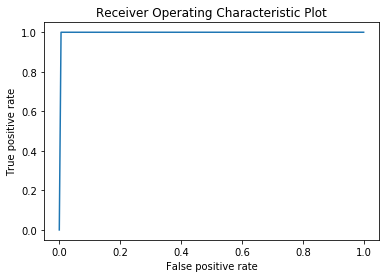

In [49]:
predicted_y = lr.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, predicted_y)
print('Area under ROC cureve:' ,auc(fpr, tpr))
fig = plt.figure(1)
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Plot')

In [ ]:
Apply Decision Tree

In [50]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(classification_report(y_test, dt.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     78432
          1       1.00      1.00      1.00     78645

avg / total       1.00      1.00      1.00    157077



Apply Gradient Boosting

In [51]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
print(classification_report(y_test, gb.predict(x_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     78432
          1       1.00      1.00      1.00     78645

avg / total       1.00      1.00      1.00    157077



# Conclusion